describe the auto-regressive model AR(p), which regresses on its own lagged terms and moving average model MA(q) builds a function of error terms of
the past. 

The AR(p) models tend to capture the mean reversion effect whereas MA(q)
models tend to capture the shock effect in error ,which are not normal or unpredicted events. 

An ARMA(p, q) time series forecasting model incorporates the p order AR, and the q order MA model.

In [2]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process

In [3]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

<IPython.core.display.Javascript object>


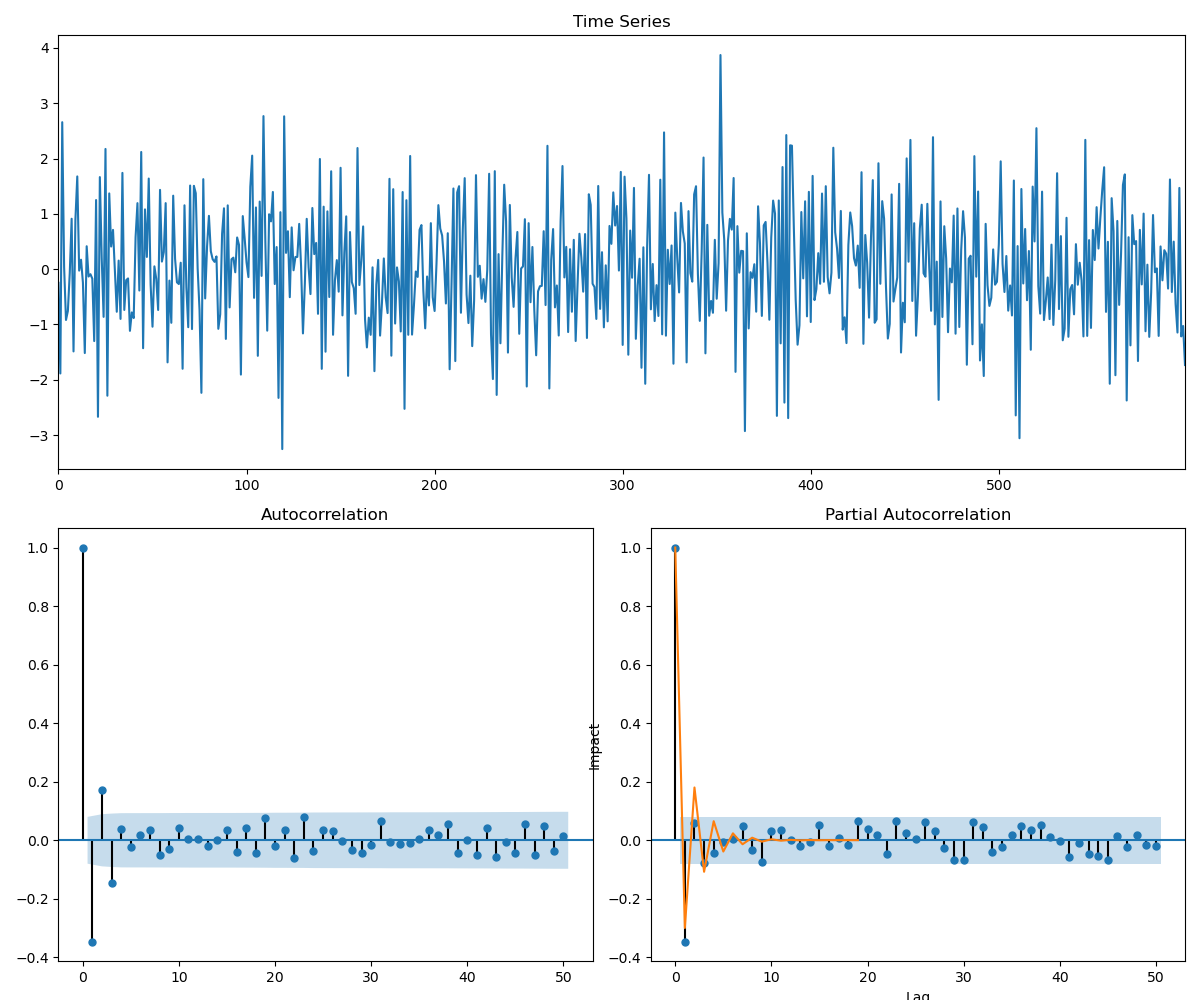

Text(0.5, 80.7222222222222, 'Lag')

In [8]:
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data )
# Impluse response curve
plt.plot(arima_process.arma_impulse_response(ar, ma, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")

In [6]:
# Build AR(1) model
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -832.693
Method:                           mle   S.D. of innovations              0.969
Date:                Wed, 15 Apr 2020   AIC                           1671.386
Time:                        11:08:19   BIC                           1684.577
Sample:                             0   HQIC                          1676.521
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.4579      0.093     -4.910      0.000      -0.641      -0.275
ma.L1.y        0.1231      0.103      1.199      0.231      -0.078       0.324
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1840           +0.0000j            2.1840            0.5000
MA.1           -8.1267           +0.0000j            8.1267            0.5000
-----------------------------------------------------------------------------
"""

In [7]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])